## Exploratory notebook: Down-sampling 19525 Hz data

The EEG of some animals during the 3-chamber experiments was recorded at a way higher sampling frequency (19525 Hz) than other animals studied in these experiments, as well as the animals studied in the resting-state experiment.

Therefore we need to resample the EEG data that was recorded at these high sampling frequencies in order to make the data comparable again.

In this notebook we investigate the effect of that resampling (and the subsequent filtering)

In [178]:
import mne
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
from shared.eeg_filtering_functions import filter_eeg

from settings import *

In [137]:
electrode_info = filtering['electrode_info']

### Low sampling frequency example

Let's load a EDF file that was recorded at a sampling frequency of 1084

In [87]:
file = "/Users/olledejong/Documents/MSc_Biology/ResearchProject2/rp2_data/3C_sociability/input/edf_files/DRD2_batch6_3C-sociability/TAINI_101A_39508_6.5_2023-12-20_10-39-48_301_0000.edf"
raw_low_sf = mne.io.read_raw_edf(file)
s_freq_low = raw_low_sf.info['sfreq']

Let's visualize a bit

In [88]:
data_low_sf = raw_low_sf.get_data(picks=list(electrode_info.keys()))

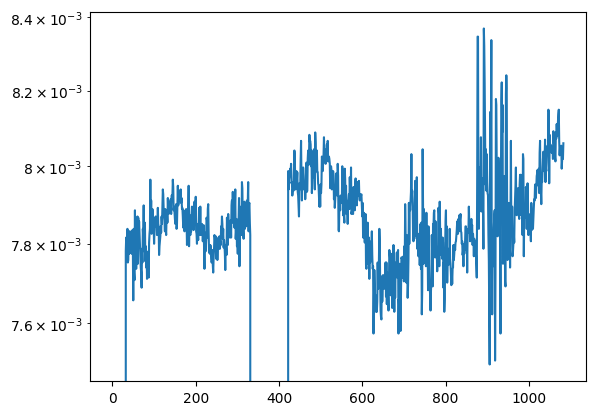

In [89]:
plt.plot(data_low_sf[0,:][:int(s_freq_low)])
plt.yscale('log')
plt.show()

Let's zoom in a bit

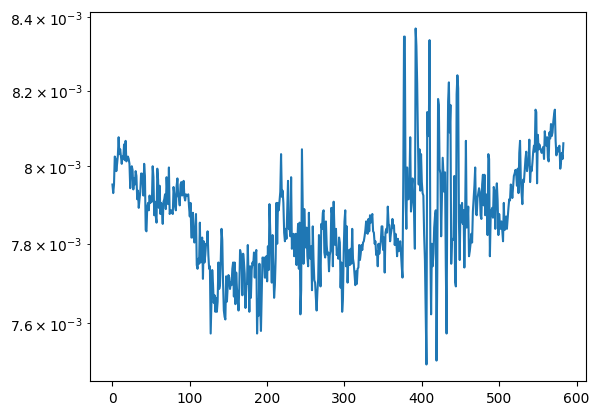

In [91]:
plt.plot(data_low_sf[0,:][int(s_freq_low / 2):int(s_freq_low)])
plt.yscale('log')
plt.show()

### Resample and plot again

In [92]:
raw_low_sf_resampled = raw_low_sf.resample(500, npad="auto")
print(f"Sampling freq is now {round(s_freq_low/500, 2)} times lower ({round(s_freq_low, 2)} --> 500)")

Sampling freq is now 2.17 times lower (1084.72 --> 500)


In [93]:
data_low_sf_resampled = raw_low_sf_resampled.get_data(picks=list(electrode_info.keys()))

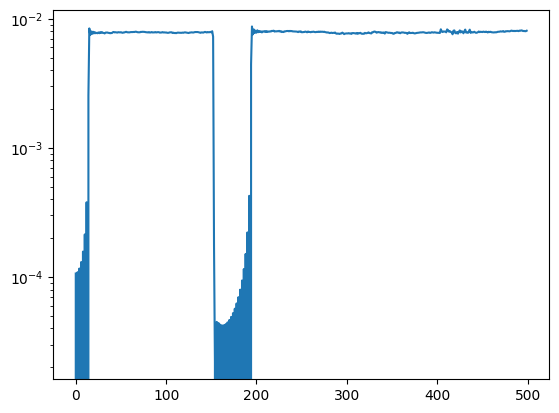

In [96]:
plt.plot(data_low_sf_resampled[0,:][:500]) # 500 datapoints is now one second
plt.yscale('log')
plt.show()

Let's zoom in a bit

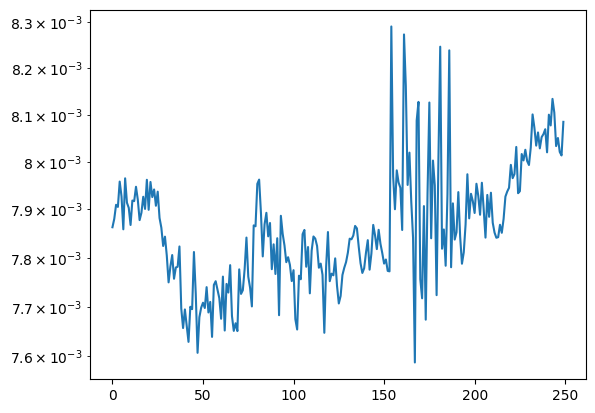

In [98]:
x1, x2 = int(500 / 2), 500
plt.plot(data_low_sf_resampled[0,:][x1:x2])
plt.yscale('log')
plt.show()

### High sampling frequency example

Let's load a EDF file that was recorded at a way higher

In [72]:
file = "/Users/olledejong/Documents/MSc_Biology/ResearchProject2/rp2_data/3C_sociability/input/edf_files/DRD2_batch1_3C_sociability/TAINI_1019_78211_1.1_2023-07-05_12-05-02_401_0000.edf"
raw_high_sf = mne.io.read_raw_edf(file)
s_freq_high = raw_high_sf.info['sfreq']
print(s_freq_high)

19525.0


Let's visualize a bit

In [73]:
data_high_sf = raw_high_sf.get_data(picks=list(electrode_info.keys()))

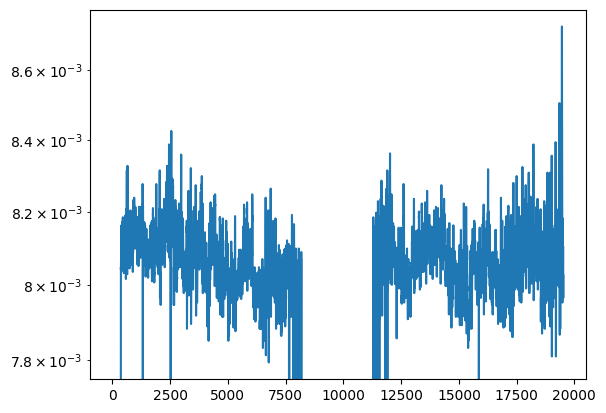

In [83]:
plt.plot(data_high_sf[0,:][:int(s_freq_high)])
plt.yscale('log')
plt.show()

Let's zoom in a bit

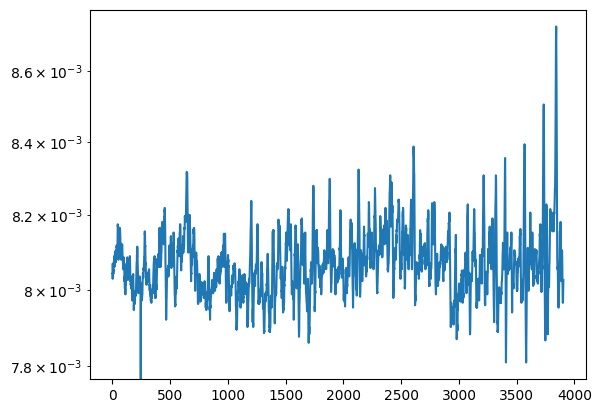

In [85]:
x1, x2 = int(s_freq_high / 5 * 4), int(s_freq_high)
plt.plot(data_high_sf[0,:][x1:x2])
plt.yscale('log')
plt.show()

### Resample and plot again

In [76]:
raw_high_sf_resampled = raw_high_sf.resample(500, npad="auto")
print(f"Sampling freq is now {round(s_freq_high/500, 2)} times lower ({round(s_freq_high, 2)} --> 500)")

Sampling freq is now 39.05 times lower (19525.0 --> 500)


In [77]:
data_high_sf_resampled = raw_high_sf_resampled.get_data(picks=list(electrode_info.keys()))

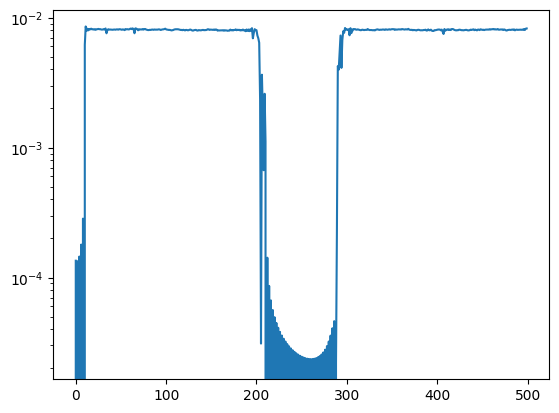

In [78]:
plt.plot(data_high_sf_resampled[0,:][:500])
plt.yscale('log')
plt.show()

Let's zoom in a bit

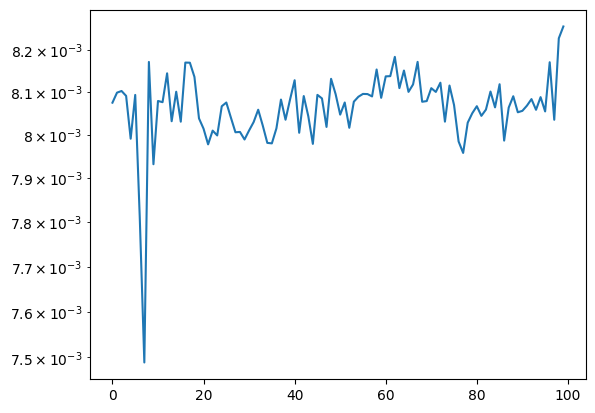

In [82]:
plt.plot(data_high_sf_resampled[0,:][400:500])
plt.yscale('log')
plt.show()

## Effect of down-sampling on the PSD

In [156]:
file = "/Users/olledejong/Documents/MSc_Biology/ResearchProject2/rp2_data/3C_sociability/input/edf_files/DRD2_batch1_3C_sociability/TAINI_1019_78211_1.1_2023-07-05_12-05-02_401_0000.edf"
raw_high_sf = mne.io.read_raw_edf(file)
s_freq_high = raw_high_sf.info['sfreq']

Calculate power spectral density (PSD) for a few seconds of non-package loss raw EEG signal

In [157]:
data_high_sf = raw_high_sf.get_data(picks='EEG 2')  # ofc_r

Slice a second of non-package loss data 

In [158]:
one_sec_dat = data_high_sf[0,:][int(s_freq_high * 7):int(s_freq_high * 8)]

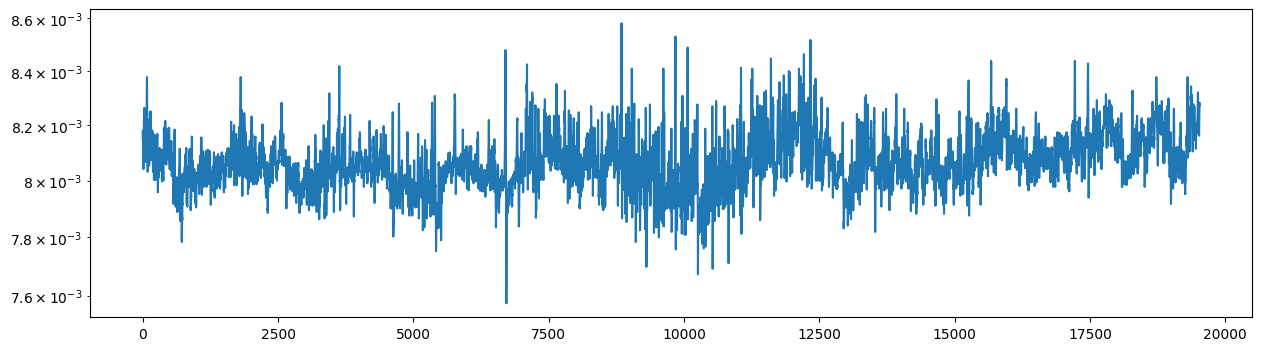

In [159]:
fig = plt.figure(figsize=(15,4))
plt.plot(one_sec_dat)
plt.yscale('log')
plt.show()

In [160]:
psd_high_sf, freq = psd_array_multitaper(one_sec_dat, fmin=0, fmax=100, sfreq=s_freq_high, n_jobs=-1, verbose=False)

Resample

In [161]:
hsf_resampled = raw_high_sf.resample(500, npad="auto")
data_high_sf_resampled = raw_high_sf.get_data(picks='EEG 2')  # ofc_r
one_sec_dat_resampled = data_high_sf_resampled[0,:][int(500 * 7):int(500 * 8)]

Calc PSD

In [162]:
psd_high_sf_resampled, freq = psd_array_multitaper(one_sec_dat_resampled, fmin=0, fmax=100, sfreq=500, n_jobs=-1, verbose=False)

Let's also try a downsampled filtered signal.

In [191]:
electrode_info = filtering['electrode_info']
lcut, hcut = filtering['lcut'], filtering['hcut']
low_val, high_val = filtering['low_val'], filtering['high_val']
art = filtering['art']

filtered_data = filter_eeg(hsf_resampled['EEG 2'][0][0], 500, lcut, hcut, low_val, high_val, art)

array([ 0.00022339,  0.00248758,  0.0047224 , ..., -0.0044619 ,
       -0.00438772, -0.00431071])

Calc PSD of the filtered downsampled signal

In [192]:
one_sec_dat_resampled_filtered = filtered_data[int(500 * 7):int(500 * 8)]
psd_high_sf_resampled_filtered, freq = psd_array_multitaper(one_sec_dat_resampled_filtered, fmin=0, fmax=100, sfreq=500, n_jobs=-1, verbose=False)

Plot the visual difference between the signals and the PSDs in the same figure

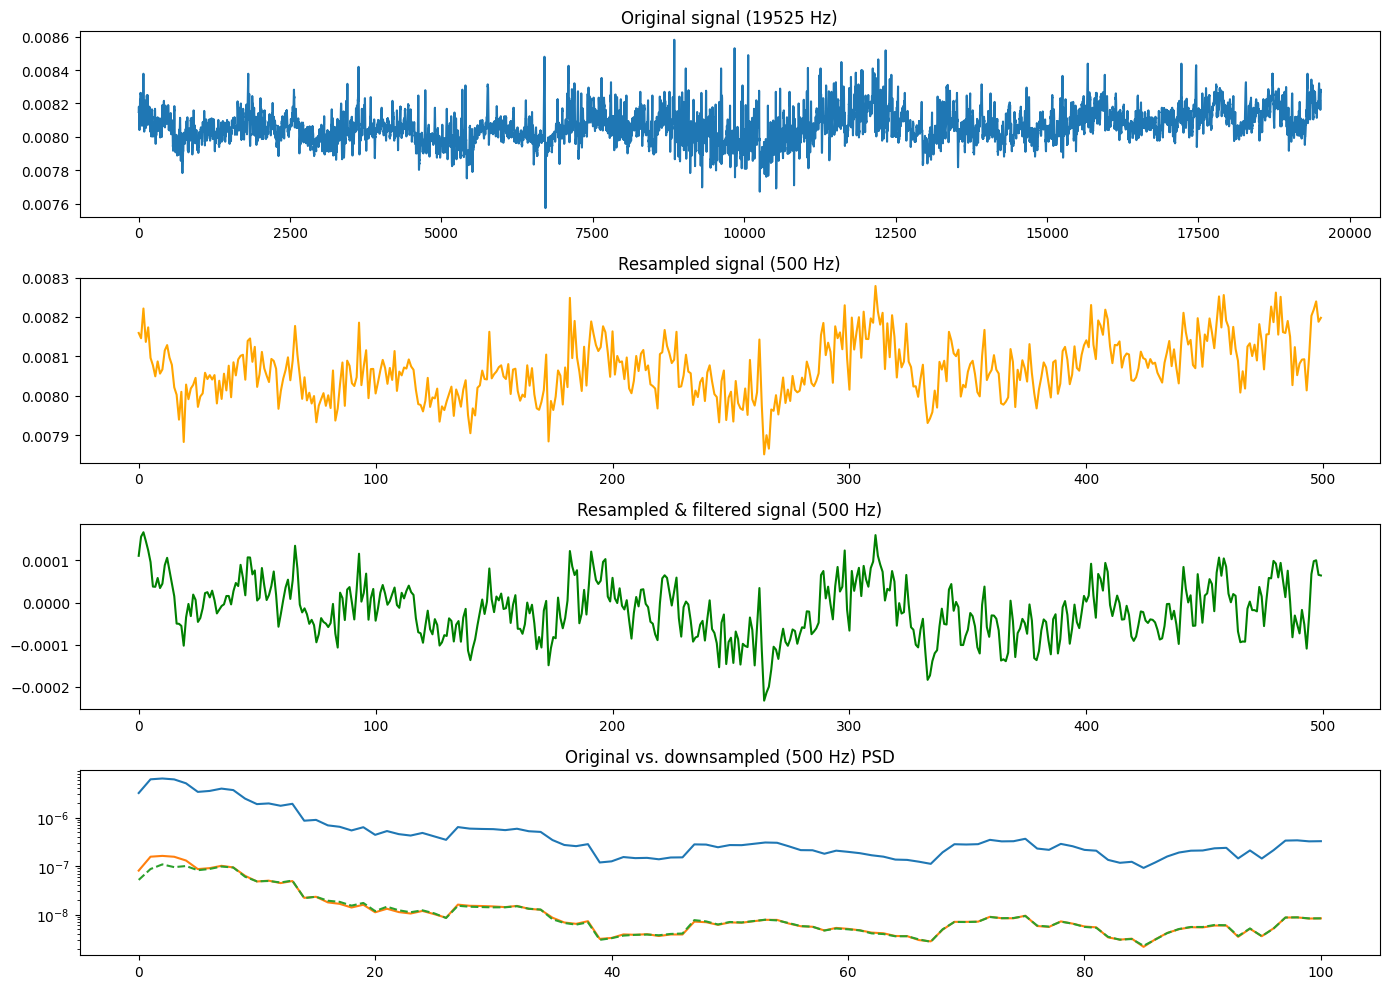

In [220]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10))
axs = axs.ravel()

axs[0].plot(one_sec_dat)
axs[0].set_title('Original signal (19525 Hz)')
axs[1].plot(one_sec_dat_resampled, color='orange')
axs[1].set_title('Resampled signal (500 Hz)')
axs[2].plot(one_sec_dat_resampled_filtered, color='green')
axs[2].set_title('Resampled & filtered signal (500 Hz)')

axs[3].plot(freq, psd_high_sf, label='Original (19525 Hz)')
axs[3].plot(freq, psd_high_sf_resampled, label='Resampled (500 Hz)')
axs[3].plot(freq, psd_high_sf_resampled_filtered, label='Resampled filtered (500 Hz)', linestyle='--')
axs[3].set_title("Original vs. downsampled (500 Hz) PSD")

plt.yscale('log')
plt.tight_layout()
plt.show()

So, the resampling (down-sampling) doesn't really seem to affect the PSD trajectory, apart from the fact that the scale changes. Howevere, if you resample all data to e.g. 500 Hz, the scales are gonna be the same and thus comparable.

The difference you see between the orange (resampled to 500Hz) and green (resampled to 500Hz and filtered) power spectral densities is because of the filtering, and that makes sense. The same would happen to signals you filter without resampling it first.

Lastly, let's compare a stretch of the resampled (500Hz) raw and the resampled filtered signals that contains package loss

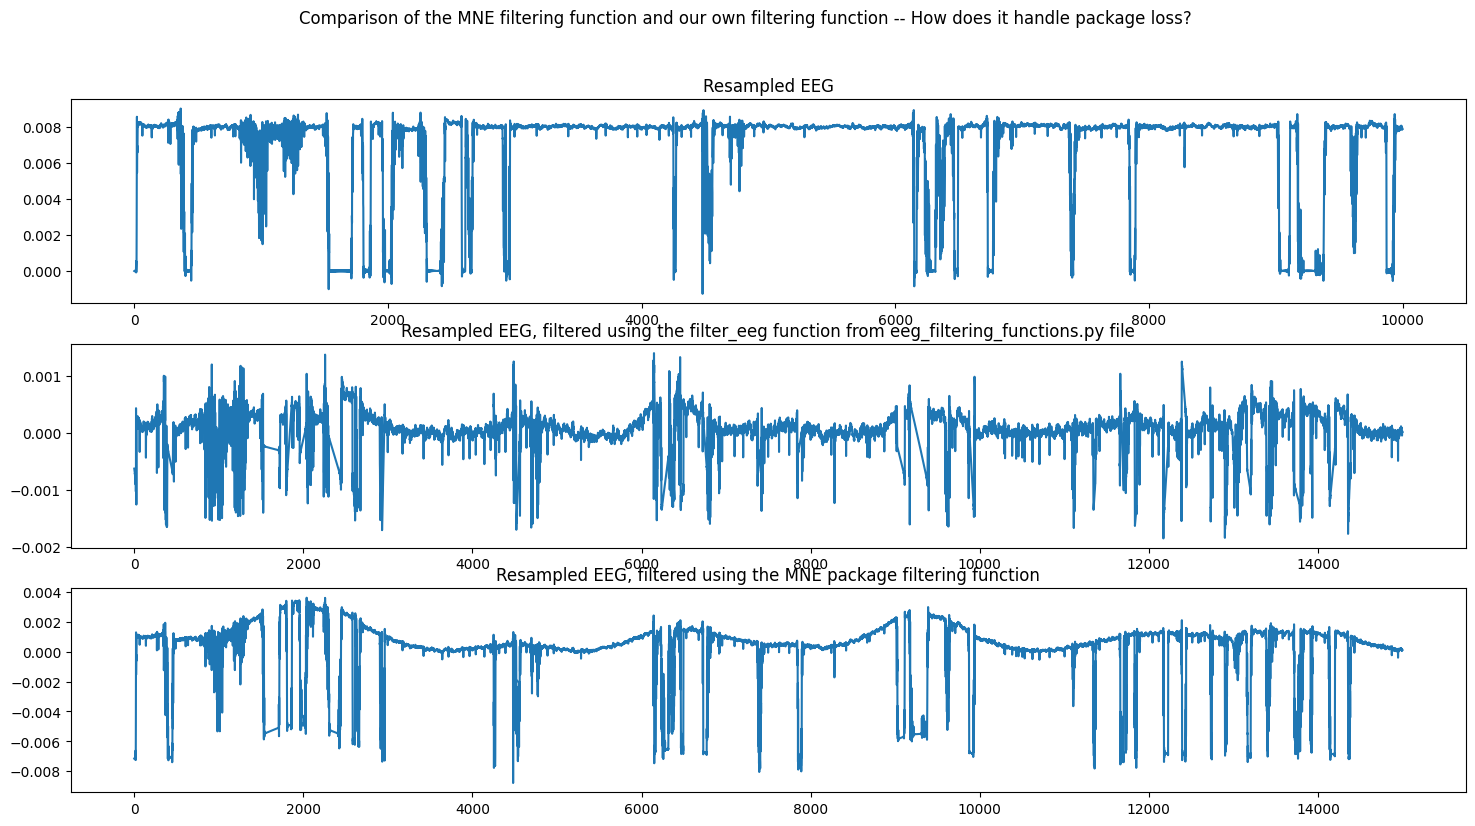

In [221]:
fig, axs = plt.subplots(3, 1, figsize = (18,9))

axs[0].plot(data_high_sf_resampled[0,200000:210000])
axs[0].set_title('Resampled EEG')
axs[1].plot(filtered_data[200000:215000])
axs[1].set_title('Resampled EEG, filtered using the filter_eeg function from eeg_filtering_functions.py file')
axs[2].plot(mne.filter.filter_data(hsf_resampled['EEG 2'][0][0], 500, lcut, hcut)[200000:215000])
axs[2].set_title('Resampled EEG, filtered using the MNE package filtering function')

plt.suptitle('Comparison of the MNE filtering function and our own filtering function -- How does it handle package loss?')
plt.show()

This exploratory notebook indicates that we can safely down-sample the EEG that was recorded in a way higher sampling frequency. We decided to downsample all data to 500 Hz, and then apply the filtering as we did with the resting-state experiment.